In [111]:
import os
import string

import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [112]:
import torch
print(torch.__version__)

2.8.0+cu129


In [113]:
PATH_TO_DATASET = os.path.join(".", "dataset")
PATH_TO_CAPTIONS = os.path.join(PATH_TO_DATASET, "captions.txt")
PATH_TO_IMAGES_FOLDER = os.path.join(PATH_TO_DATASET, "Images")

In [114]:
df = pd.read_csv(PATH_TO_CAPTIONS)
df.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [115]:
df.isnull().sum()

image      0
caption    0
dtype: int64

In [116]:
len(df)

40455

In [117]:
grouped_df = df.groupby("image")["caption"].apply(list)
grouped_df.head()

image
1000268201_693b08cb0e.jpg    [A child in a pink dress is climbing up a set ...
1001773457_577c3a7d70.jpg    [A black dog and a spotted dog are fighting, A...
1002674143_1b742ab4b8.jpg    [A little girl covered in paint sits in front ...
1003163366_44323f5815.jpg    [A man lays on a bench while his dog sits by h...
1007129816_e794419615.jpg    [A man in an orange hat starring at something ...
Name: caption, dtype: object

In [118]:
df.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [119]:
grouped_df = grouped_df.reset_index()
grouped_df.rename(columns={"caption": "captions"}, inplace=True)

grouped_df["path"] = PATH_TO_IMAGES_FOLDER + os.sep + grouped_df["image"].astype(str)
grouped_df.head(10)

,image,captions,path
0,1000268201_693b08cb0e.jpg,[A child in a pink dress is climbing up a set ...,.\dataset\Images\1000268201_693b08cb0e.jpg
1,1001773457_577c3a7d70.jpg,"[A black dog and a spotted dog are fighting, A...",.\dataset\Images\1001773457_577c3a7d70.jpg
2,1002674143_1b742ab4b8.jpg,[A little girl covered in paint sits in front ...,.\dataset\Images\1002674143_1b742ab4b8.jpg
3,1003163366_44323f5815.jpg,[A man lays on a bench while his dog sits by h...,.\dataset\Images\1003163366_44323f5815.jpg
4,1007129816_e794419615.jpg,[A man in an orange hat starring at something ...,.\dataset\Images\1007129816_e794419615.jpg
5,1007320043_627395c3d8.jpg,"[A child playing on a rope net ., A little gir...",.\dataset\Images\1007320043_627395c3d8.jpg
6,1009434119_febe49276a.jpg,[A black and white dog is running in a grassy ...,.\dataset\Images\1009434119_febe49276a.jpg
7,1012212859_01547e3f17.jpg,"[A dog shakes its head near the shore , a red ...",.\dataset\Images\1012212859_01547e3f17.jpg
8,1015118661_980735411b.jpg,[A boy smiles in front of a stony wall in a ci...,.\dataset\Images\1015118661_980735411b.jpg
9,1015584366_dfcec3c85a.jpg,"[A black dog leaps over a log ., A grey dog is...",.\dataset\Images\1015584366_dfcec3c85a.jpg


In [120]:
def plot_sample_image(df_grouped, sample_row_idx=42):
    sample_row_idx = 42
    sample_image_name = df_grouped.iloc[sample_row_idx]["image"]
    sample_image_captions = df_grouped.iloc[sample_row_idx]["captions"]
    sample_image_path = df_grouped.iloc[sample_row_idx]["path"]

    img = mpimg.imread(sample_image_path)

    plt.imshow(img)
    plt.title(sample_image_name, fontsize=12)
    plt.xlabel("\n".join(sample_image_captions), fontsize=8)
    plt.show()

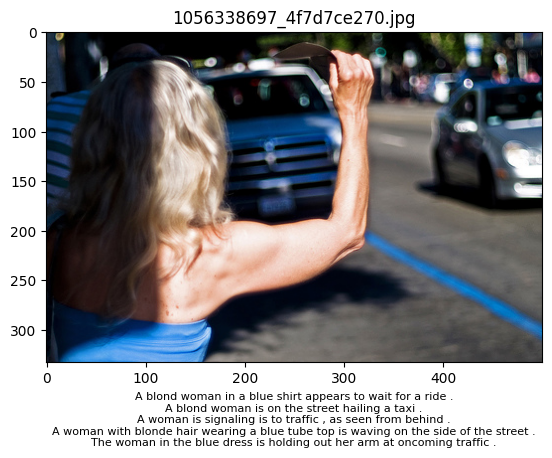

In [121]:
plot_sample_image(grouped_df)

## Data preprocessing

In [122]:
df["preprocessed_caption"] = df["caption"].apply(lambda c: c.lower())
df["preprocessed_caption"] = df["preprocessed_caption"].apply(lambda c: c.translate(str.maketrans("", "", string.punctuation)))
df["preprocessed_caption"] = df["preprocessed_caption"].apply(lambda c: c.replace("\s+", " "))
df["preprocessed_caption"] = df["preprocessed_caption"].apply(lambda c: c.strip())
df["preprocessed_caption"] = "<start> " + df["preprocessed_caption"] + " <end>"

In [123]:
tokenized_captions = df["preprocessed_caption"].apply(lambda c: c.split())
max_sentence_length = max(tokenized_captions.apply(len))
max_sentence_length

38

In [124]:
tokenized_captions = tokenized_captions.apply(lambda tokens: tokens + ["<pad>"] * (max_sentence_length - len(tokens)))
df["preprocessed_caption"] = tokenized_captions.apply(lambda tokens: " ".join(tokens))
df["preprocessed_caption"].head(10)

0    <start> a child in a pink dress is climbing up...
1    <start> a girl going into a wooden building <e...
2    <start> a little girl climbing into a wooden p...
3    <start> a little girl climbing the stairs to h...
4    <start> a little girl in a pink dress going in...
5    <start> a black dog and a spotted dog are figh...
6    <start> a black dog and a tricolored dog playi...
7    <start> a black dog and a white dog with brown...
8    <start> two dogs of different breeds looking a...
9    <start> two dogs on pavement moving toward eac...
Name: preprocessed_caption, dtype: object

In [125]:
class Vocabulary:
    def __init__(self, tokenized_captions):
        self.tokenized_captions = tokenized_captions
        self.token2idx = {}
        self.idx2token = {}
        
        unique_tokens = sorted(set(token for caption in tokenized_captions for token in caption))
        self.token2idx = {token: idx for idx, token in enumerate(unique_tokens)}
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}
        
    def map_to_indices(self, caption_tokens):
         return [self.token2idx[token] for token in caption_tokens if token in self.token2idx]
    
    def map_to_tokens(self, tokens_indices):
        return [self.idx2token[idx] for idx in tokens_indices if idx in self.idx2token]

In [126]:
vocabulary = Vocabulary(tokenized_captions)

In [127]:
# Just to test vocabulary

sample_tokens_indices = vocabulary.map_to_indices(["<start>", "<end>", "<pad>"])
print(f"Sample tokens indices: {sample_tokens_indices}")

sample_tokens_from_vocabulary = vocabulary.map_to_tokens(sample_tokens_indices)
print(f"Sample tokens retrieved by indices: {sample_tokens_from_vocabulary}")

Sample tokens indices: [53, 51, 52]
Sample tokens retrieved by indices: ['<start>', '<end>', '<pad>']


In [128]:
df["encoded_caption"] = df["preprocessed_caption"].apply(lambda c: vocabulary.map_to_indices(c.split()))
df["encoded_caption"].head(10)

0    [53, 54, 1462, 3878, 54, 5595, 2361, 3970, 156...
1    [53, 54, 3242, 3299, 3952, 54, 8707, 1089, 51,...
2    [53, 54, 4399, 3242, 1567, 3952, 54, 8707, 566...
3    [53, 54, 4399, 3242, 1567, 7841, 7325, 7945, 3...
4    [53, 54, 4399, 3242, 3878, 54, 5595, 2361, 329...
5    [53, 54, 781, 2276, 245, 54, 7255, 2276, 326, ...
6    [53, 54, 781, 2276, 245, 54, 8097, 2276, 5663,...
7    [53, 54, 781, 2276, 245, 54, 8597, 2276, 8687,...
8    [53, 8204, 2280, 5086, 2170, 994, 4457, 393, 2...
9    [53, 8204, 2280, 5116, 5415, 4855, 8012, 2442,...
Name: encoded_caption, dtype: object